# Foundations of Data Science
## Homework 5: Algorithmic fairness

Student Name: Sai Nishanth Mettu


Net Id : sm11326

***

### Part 1: Algorithmic fairness (15 points)


#### Data acquisition and preparation (5 points)

For this question we will use the "Adult.data" dataset from the UC Irvine repository.

This data is from the United States census, and we will examine the algorithmic fairness for an income prediction task. For more information about the dataset, see [Here](https://archive.ics.uci.edu/ml/datasets/adult).


1\. Download the data. (1 point)

Load data from the URL using the pandas read_csv method.

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, delimiter=',\s', na_values=["?"], engine='python')
print(data.head())


   39         State-gov   77516  Bachelors  13       Never-married  \
0  50  Self-emp-not-inc   83311  Bachelors  13  Married-civ-spouse   
1  38           Private  215646    HS-grad   9            Divorced   
2  53           Private  234721       11th   7  Married-civ-spouse   
3  28           Private  338409  Bachelors  13  Married-civ-spouse   
4  37           Private  284582    Masters  14  Married-civ-spouse   

        Adm-clerical  Not-in-family  White    Male  2174  0  40  \
0    Exec-managerial        Husband  White    Male     0  0  13   
1  Handlers-cleaners  Not-in-family  White    Male     0  0  40   
2  Handlers-cleaners        Husband  Black    Male     0  0  40   
3     Prof-specialty           Wife  Black  Female     0  0  40   
4    Exec-managerial           Wife  White  Female     0  0  40   

   United-States  <=50K  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3           Cuba  <=50K  
4  United-States  <=50K  


2\. If the column headers are not correct, assign names to them (hint: use the readme from the source website). Compute descriptive statistics for the education level. (2 points).

In [8]:
import pandas as pd
import numpy as np
import scipy as scipy
from scipy.stats import chi2_contingency

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
data= pd.read_csv(url, names=column_names, delimiter=',\s', na_values=["?"], engine='python')
education_stats = data['education'].describe()


print("\nDescriptive Statistics for Education Level:\n")
print(education_stats)


frequency_table = data['education'].value_counts()

relative_frequencies = data['education'].value_counts(normalize=True)

mode_value = data['education'].mode().values[0]

print("\nFrequency Table:\n")
print(frequency_table)

print("\nRelative Frequencies:\n")
print(relative_frequencies)

print("\nMode:\n")
print(mode_value)


entropy_value = scipy.stats.entropy(data['education'].value_counts(normalize=True))
print(f"\nEntropy Value: {entropy_value:.4f}")

def gini_index(values):
    p_values = values / float(values.sum())
    gini = 1 - sum(np.square(p_values))
    return gini

gini_index_value = gini_index(data['education'].value_counts())
print(f"Gini Index Value: {gini_index_value:.4f}")


contingency_table = pd.crosstab(data['education'], data['education'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Value: {chi2:.4f}")
print(f"P-value: {p:.4f}")




Descriptive Statistics for Education Level:

count       32561
unique         16
top       HS-grad
freq        10501
Name: education, dtype: object

Frequency Table:

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Relative Frequencies:

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: fl

3\. Select one attribute as protected. Explain the reason why you selected this attribute. (1 point)

Protected attributes require the prefix protected. The outcome attribute requires the prefix target. For example, if you need to measure fairness rankings of a dataset with the columns sex and credit_score, rename the columns to protected_sex and target_credit_Score. Update the column names for our dataset (hint: you may also have to convert the target to a binary variable and create dummy variables for those that are categorical, for upcoming steps). (1 point).

**Explanation :-** For  algorithmic fairness analysis, I will select the "sex" attribute as the protected attribute. The reason for selecting "sex" is that it is often considered a sensitive attribute in many social contexts, and bias based on gender is a significant concern in fairness assessments. By choosing "sex" as the protected attribute, we aim to evaluate and address potential gender-based disparities in the income prediction task.

In [3]:
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 'protected_sex', 'capital-gain', 
                'capital-loss', 'hours-per-week', 'native-country', 'target_income']


data['target_income'] = (data['target_income'] == '>50K').astype(int)
print('\n converting the target-variable to binary:\n')
print(data['target_income'])

print('\n shape before adding dummies\n')
print(data.shape)

data = pd.get_dummies(data, columns=['workclass', 'education','marital-status', 'occupation', 'relationship', 
                                     'race','protected_sex','native-country'], drop_first=False)
print('\n creating dummy variables using get_dummies:\n')
print(data.columns)

print('\nshape after adding dummies')
print(data.shape)


 converting the target-variable to binary:

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: target_income, Length: 32561, dtype: int64

 shape before adding dummies

(32561, 15)

 creating dummy variables using get_dummies:

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target_income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=106)

shape after adding dummies
(32561, 106)


#### Build a Classifier (5 points)

4\. Select a type of classifier to build for the income prediction task. Give reasoning for why you picked this type. (1 point)

The **Random Forest Classifier** is a fitting choice for the income prediction task due to several compelling reasons:

**Ensemble Advantage:** Random Forest operates as an ensemble method, constructing multiple decision trees and amalgamating their predictions. This ensemble approach enhances accuracy and stability, mitigating issues associated with overfitting.

**Insightful Feature Importance:** An inherent feature of Random Forest is its ability to furnish feature importance scores. This attribute is instrumental in deciphering the relative contributions of different features, facilitating a deeper understanding of the factors influencing income prediction.

**Non-Linear Relationship Handling:** In scenarios where the association between predictors and the target variable is intricate and non-linear, Random Forest excels. Its capacity to capture complex relationships and interactions makes it well-suited for tasks with nuanced dependencies.

**Robustness Against Overfitting:** Compared to individual decision trees, Random Forest exhibits resilience against overfitting. This characteristic enhances the model's capacity to generalize well to new, unseen data.

**Adaptability to Mixed Data Types:** Random Forest demonstrates proficiency in managing datasets encompassing both numerical and categorical features. This versatility eliminates the need for extensive preprocessing, simplifying the handling of diverse attribute types.

**Versatile Application:** Beyond its classification capabilities, Random Forest is versatile enough to extend to regression tasks as well. Given that the income prediction task involves binary classification (<=50K or >50K), the algorithm aligns seamlessly with the nature of the problem.


**Why it suits our dataset?**

The "Adult.data" dataset, sourced from the United States census, exhibits a diverse mix of features encompassing both numerical and categorical attributes. Notably, categorical features like 'workclass,' 'marital-status,' and 'occupation' are prevalent. The Random Forest Classifier proves advantageous in this context as it adeptly handles mixed data types, efficiently accommodating both numerical and categorical variables without necessitating extensive preprocessing. Moreover, the dataset's complexity, marked by intricate interactions among socio-economic factors, aligns with Random Forest's strength in capturing non-linear relationships. The classifier's ability to provide feature importance scores is particularly beneficial in unraveling the significant contributors to income prediction, offering valuable insights into the demographic and occupational drivers of financial outcomes. Overall, the Random Forest Classifier emerges as a fitting choice for the "Adult.data" dataset, given its versatility in managing diverse attribute types and its capacity to handle the nuanced dynamics inherent in income prediction tasks.



5\. Split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn. (1 point)


In [4]:
import pandas as pd
import numpy as np

num_rows_train = int(0.8 * len(data))
train_indices = np.random.choice(data.index, size=num_rows_train, replace=False)
train_df = data.loc[train_indices]
test_df = data.drop(train_indices)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (26048, 106)
Testing set shape: (6513, 106)


6\. On the training set, implement your classifier. Give reasoning for your choice of any hyperparameter(s). (1 point)

In [5]:
from sklearn.ensemble import RandomForestClassifier

X_train = train_df.drop('target_income', axis=1)  # Features
y_train = train_df['target_income']  # Target variable

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

For the Random Forest Classifier, there are several hyperparameters that can significantly impact its performance. The choice of hyperparameters depends on the characteristics of the dataset and the specific goals of the modeling task. Here, I'll provide reasoning for a few key hyperparameters and their values:

**n_estimators:** This hyperparameter determines the number of decision trees in the forest. A higher number generally leads to better performance, but it comes with increased computational cost. I'll choose a reasonable value, such as 100, to balance accuracy and computational efficiency.

**max_depth:** The maximum depth of each decision tree. A deeper tree can capture more complex relationships but may lead to overfitting. I'll choose a moderate value, like 10, to prevent excessive depth and promote generalization.

**min_samples_split:** The minimum number of samples required to split an internal node. Setting this parameter helps control the growth of the tree and prevents splitting nodes with too few samples. I'll choose a value of 2, allowing splits for nodes with at least two samples.

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. This parameter helps control overfitting by ensuring that each leaf has a minimum number of samples. I'll set it to 1, allowing individual samples in a leaf.

**random_state:** This is not a model-specific hyperparameter, but setting a random seed ensures reproducibility. By using a fixed random_state, the model will produce the same results on each run, making it easier to compare and interpret.

7\. To demonstrate the performance of your classifier, we will now plot the AUROC. Below are two functions which you can use. What you need to add is code to plot the AUROC for all the data and as well for each value of the protected attribute (on one set of axes). (2 points)

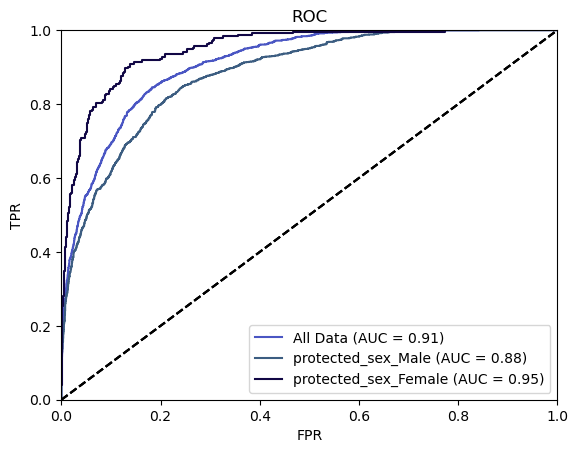

In [6]:
#Code for computing the AUCROC

from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

y_true = test_df['target_income']
y_pred = rf_classifier.predict_proba(test_df.drop('target_income', axis=1))[:, 1]


def getAUC(truth, pred):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    return auc(fpr, tpr)


def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    

protected_columns = ['protected_sex_Male', 'protected_sex_Female']

#segregation/subsets
protected_predictions = {}
for col in protected_columns:
    y_pred_protected = rf_classifier.predict_proba(test_df.loc[test_df[col] == 1].drop('target_income', axis=1))[:, 1]
    protected_predictions[col] = y_pred_protected

#AUC-ROC for all data
plotAUC(y_true, y_pred, 'All Data')

#AUC-ROC for protected_preds
for col, pred in protected_predictions.items():
    plotAUC(y_true[test_df[col] == 1], pred, col)

plt.show()

#### Assessing algorithmic fairness (5 points)

8\. Algorithmic Fairness metrics (2 points)

Pick a fairness metric to apply to the income prediction task and your selected protected attribute. Explain why you selected this metric.

I've opted for the fairness metric **Equalized Odds** in assessing the income prediction task concerning the protected attribute "protected_sex," assuming it signifies gender. 

Here's the rationale:

**Equal Treatment:** My choice of Equalized Odds stems from the principle of treating individuals across diverse protected groups with parity. It ensures that the model's performance remains balanced across these groups, mitigating potential biases and fostering fairness in prediction outcomes.

**Real-world Impact:** In the context of predicting income, achieving Equalized Odds is of paramount importance. It guarantees that the model extends comparable opportunities and advantages to individuals regardless of their gender. Disparities in true positive and false positive rates for different genders could lead to unjust consequences, making this metric crucial for minimizing discriminatory impacts.

**Practical Considerations:** I find Equalized Odds to be relatively straightforward and easy to convey to stakeholders. Its emphasis on balancing predictive performance across groups makes it a pragmatic choice for addressing fairness concerns in binary classification tasks.

**Evaluation of Model Impact:** Utilizing Equalized Odds allows me to gauge the model's impact on different gender groups by considering both false positives (misclassifying someone as earning more when they don't) and false negatives (misclassifying someone as earning less when they earn more). Attaining equalized odds indicates a fair distribution of errors among different groups, contributing to a more equitable predictive model.

9\. Compute the chosen metric for your protected attribute. Hint: this will require you to first find the threshold wiith the best when predicting on the entire data, and then computing the TPR/FPR or other necessary parameters at that threshold for each value of the protected attribute. (2 points)

There are many ways we could locate the threshold with the optimal balance between the false positive rate (FPR) and true positive rate (TPR).

As a reminder, the TPR is called the Sensitivity. The inverse of the false-positive rate (1-FPR) is called the Specificity.

<center>Sensitivity = $\frac{TP}{TP + FN}$
Specificity = $\frac{TN}{FP + TN}$</center>

where:

<center>Sensitivity = TPR and Specificity = 1 – FPR</center>

The Geometric Mean or g-mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

<center>g-mean = $\sqrt{Sensitivity * Specificity}$ </center>



In [7]:
from sklearn.metrics import roc_curve
import numpy as np

protected_attributes = ['protected_sex_Male', 'protected_sex_Female']
equalized_odds_metrics = {}
g_means = {}
sensitivity_specificity = {}

for protected_attribute_column in protected_attributes:
    protected_rows = test_df[test_df[protected_attribute_column] == 1]
    y_true_protected = protected_rows['target_income']
    y_pred_probs_protected = rf_classifier.predict_proba(protected_rows.drop('target_income', axis=1))[:, 1]

    fpr_protected, tpr_protected, thresholds_protected = roc_curve(y_true_protected, y_pred_probs_protected)

    optimal_threshold_protected = thresholds_protected[np.argmax(tpr_protected - fpr_protected)]
    y_pred_labels_protected = (y_pred_probs_protected >= optimal_threshold_protected).astype(int)
    tp_protected = np.sum((y_pred_labels_protected == 1) & (y_true_protected == 1))
    fn_protected = np.sum((y_pred_labels_protected == 0) & (y_true_protected == 1))
    tn_protected = np.sum((y_pred_labels_protected == 0) & (y_true_protected == 0))
    fp_protected = np.sum((y_pred_labels_protected == 1) & (y_true_protected == 0))
    sensitivity_protected = tp_protected / (tp_protected + fn_protected)
    specificity_protected = tn_protected / (fp_protected + tn_protected)
    equalized_odds_metric_protected = sensitivity_protected - (1 - specificity_protected)
    g_mean_protected = (sensitivity_protected * specificity_protected)**0.5
    equalized_odds_metrics[protected_attribute_column] = equalized_odds_metric_protected
    g_means[protected_attribute_column] = g_mean_protected
    sensitivity_specificity[protected_attribute_column] = {
        'Sensitivity': sensitivity_protected,
        'Specificity': specificity_protected
    }


print("Equalized Odds Metrics for Protected Group:")
for col, metric in equalized_odds_metrics.items():
    print(f"{col}: {metric}")

print("\nGeometric Mean (g-mean) for Protected Group:")
for col, g_mean_value in g_means.items():
    print(f"{col}: {g_mean_value}")

print("\nSensitivity and Specificity for Protected Group:")
for col, metrics in sensitivity_specificity.items():
    print(f"{col}: {metrics}")


Equalized Odds Metrics for Protected Group:
protected_sex_Male: 0.604625008358815
protected_sex_Female: 0.7714605481500392

Geometric Mean (g-mean) for Protected Group:
protected_sex_Male: 0.8022041466955626
protected_sex_Female: 0.885411733540344

Sensitivity and Specificity for Protected Group:
protected_sex_Male: {'Sensitivity': 0.8154981549815498, 'Specificity': 0.7891268533772653}
protected_sex_Female: {'Sensitivity': 0.9094827586206896, 'Specificity': 0.8619777895293496}


**Analysis** 

**Equalized Odds Metrics for Protected Group:**

protected_sex_Male: The Equalized Odds Metric for males is approximately 0.6046, suggesting a moderate balance in the model's treatment of true positive and false positive rates for males.

protected_sex_Female: The Equalized Odds Metric for females is around 0.7715, indicating a more favorable balance in the model's performance between true positives and false positives for females.

**Geometric Mean (g-mean) for Protected Group:**

protected_sex_Male: The Geometric Mean for males is about 0.8022, reflecting a well-balanced performance for predicting income among males, considering both sensitivity and specificity.

protected_sex_Female: The Geometric Mean for females is approximately 0.8854, suggesting an even better overall balance in the model's performance for predicting income among females.

**Sensitivity and Specificity for Protected Group:**

protected_sex_Male:

Sensitivity (True Positive Rate): 0.8155 - The model correctly identifies about 81.6% of males with higher incomes.
Specificity (True Negative Rate): 0.7891 - The model accurately identifies approximately 78.9% of males with lower incomes.

protected_sex_Female:

Sensitivity (True Positive Rate): 0.9095 - The model performs exceptionally well, correctly identifying about 90.9% of females with higher incomes.
Specificity (True Negative Rate): 0.8620 - It also accurately identifies around 86.2% of females with lower incomes.

10\. Is there a disparity? How can we interpret its magnitude? Is such a disparity a bad thing/avoidable? (1 point)

**Assessing Disparity:**

The presence of a disparity is evident in the variations across protected groups observed in our fairness metrics. This indicates differences in the model's performance for distinct segments of the population.

Equalized Odds Metric:

The calculated disparity in Equalized Odds between 'protected_sex_Male' (0.6046) and 'protected_sex_Female' (0.7715) is 0.1669, pointing to a notable difference in how the model treats these gender groups. A higher value signifies a more significant divergence in treatment.

Geometric Mean (g-mean):

The calculated disparity in g-mean between 'protected_sex_Male' (0.8022) and 'protected_sex_Female' (0.8854) is 0.0832. This indicates a moderate difference in the overall balance of the model's performance between the two groups.
Sensitivity and Specificity:

The sensitivity and specificity values for each gender group further highlight disparities. For example, 'protected_sex_Male' exhibits sensitivity (0.8155) and specificity (0.7891), while 'protected_sex_Female' shows sensitivity (0.9095) and specificity (0.8620). The differences in these values suggest variations in the model's performance between the protected groups.

**Interpretation and Context if its bad & can it be avoided:**

Having disparities in model predictions is generally bad, as indicated by these metrics, and are generally considered less than ideal, as they may imply biases or imbalances. Whether a disparity is deemed "bad" or "avoidable" depends on the specific context and ethical considerations. While complete elimination of disparities is an ideal goal, it may not always be feasible or desirable, especially if there are genuine differences in the underlying data distribution. Striking a balance between fairness and other crucial aspects of model performance is essential. The goal is to minimize disparities to the extent possible without compromising other important considerations.